In [52]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
# Visualisasi dan manipulasi data
import fnmatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#style dari matplotlib
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

# Pembuatan plot dari model 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Preprocessing gambar 
from keras.preprocessing.image import ImageDataGenerator

# Library untuk deeplearning
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# Library untuk filter CNN 
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
import random as rn

# Untuk membaca dan mengolah gambar dari folder
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [53]:
# Ini adalah direktori dari masing masing dataset yang digunakan
Z=[]
IMG_SIZE=150
batik_bali_DIR = 'batik-bali'
batik_lasem_DIR = 'batik-lasem'
batik_megamendung_DIR = 'batik-megamendung'
batik_Tambal_DIR = 'batik-Tambal'


In [54]:
# ini merupakan fungsi untuk memberi label pada batik
def assign_label(img,batik_type):
    return batik_type

In [55]:
# ini merupakan fungsi untuk membuat dataset dimana membaca semua gambar pada folder yang tersedia
X=[]

def make_train_data(batik_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        if fnmatch.fnmatch(img, '*.jpg'):
            label=assign_label(img,batik_type)
            path = os.path.join(DIR,img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

            X.append(np.array(img))
            Z.append(str(label))

In [56]:
# Proses pemanggilan fungsi batik bali untuk di eksekusi
make_train_data('batik_bali',batik_bali_DIR)
print(len(X))

100%|██████████| 121/121 [00:03<00:00, 34.63it/s]

121


In [ ]:
# Proses pemanggilan fungsi batik lasem untuk di eksekusi
make_train_data('batik_lasem',batik_lasem_DIR)
print(len(X))

100%|██████████| 120/120 [00:03<00:00, 30.86it/s]

241


In [59]:
# Proses pemanggilan fungsi batik megamendung untuk di eksekusi
make_train_data('batik-megamendung',batik_megamendung_DIR)
print(len(X))

  2%|▏         | 2/116 [00:00<00:08, 13.95it/s]

100%|██████████| 116/116 [00:04<00:00, 25.38it/s]

357


In [60]:
# Proses pemanggilan fungsi batik Tambal untuk di eksekusi
make_train_data('batik_Tambal',batik_Tambal_DIR)
print(len(X))

100%|██████████| 120/120 [00:03<00:00, 31.52it/s]

477


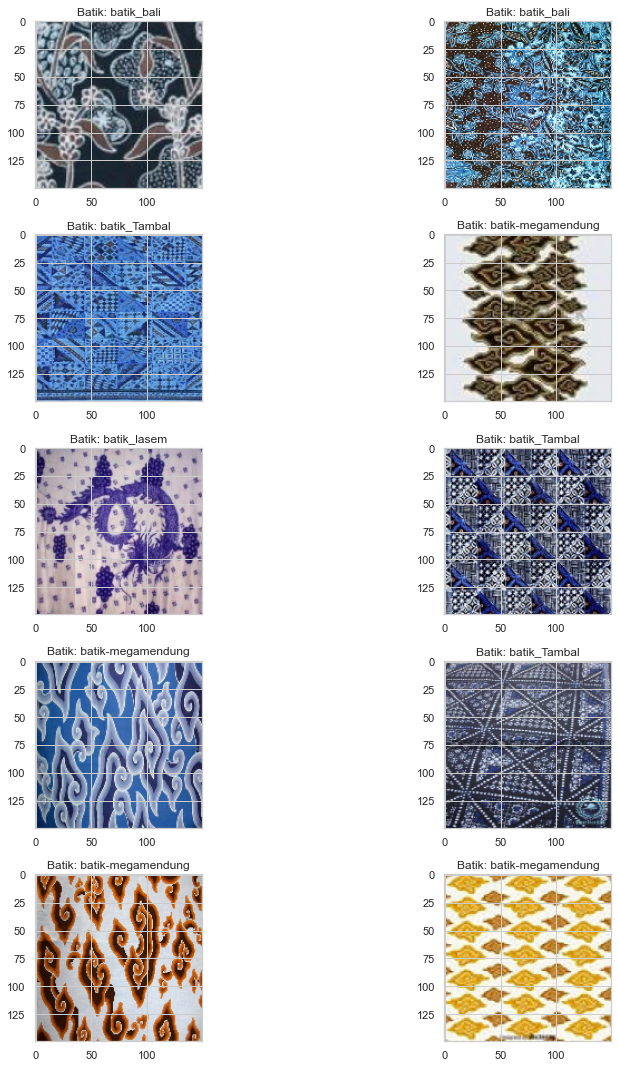

In [61]:
# menampilkan gambar batik secara acak

fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Batik: '+Z[l])
        
plt.tight_layout()

In [62]:
# mengubah gambar menjadi bit
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,4)
X=np.array(X)
X=X/255

In [63]:
#membuat data tes dan data training
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

In [64]:
# digunakan agar setiap random tidak berubah hasil akhirnya
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [65]:
# model dari CNN yang memiliki 10jt
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))


In [66]:
# digunakan untuk mengatur batch size dan epochs pada setiap proses
batch_size=64
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [67]:
# Menampilkan gambar secara acak untuk training data
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.2, 
        height_shift_range=0.2,  
        horizontal_flip=True,  
        vertical_flip=False)  


datagen.fit(x_train)

In [68]:
# untuk mengatutr accuracy pada saat training data
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [69]:
#proses menghitung jumlah parameter dalam filter
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 82944)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [70]:
# melakukan training data sejumlah epoch dan menghitung lost dan accuracy pada setiap epoch
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/50
5/5 [==============================] - 21s 4s/step - loss: 2.1434 - accuracy: 0.2355 - val_loss: 1.4224 - val_accuracy: 0.4500
Epoch 2/50
5/5 [==============================] - 18s 4s/step - loss: 1.3215 - accuracy: 0.4219 - val_loss: 1.3048 - val_accuracy: 0.3500
Epoch 3/50
5/5 [==============================] - 17s 3s/step - loss: 1.1798 - accuracy: 0.4369 - val_loss: 1.2171 - val_accuracy: 0.5083
Epoch 4/50
5/5 [==============================] - 23s 5s/step - loss: 1.0433 - accuracy: 0.5631 - val_loss: 1.1524 - val_accuracy: 0.5000
Epoch 5/50
5/5 [==============================] - 20s 4s/step - loss: 1.0508 - accuracy: 0.5531 - val_loss: 1.1810 - val_accuracy: 0.4750
Epoch 6/50
5/5 [==============================] - 17s 4s/step - loss: 1.0123 - accuracy: 0.5495 - val_loss: 1.0257 - val_accuracy: 0.5833
Epoch 7/50
5/5 [==============================] - 16s 3s/step - loss: 0.9128 - accuracy: 0.5802 - val_loss: 1.0302 - val_accuracy: 0.6000
Epoch 8/50
5/5 [==================

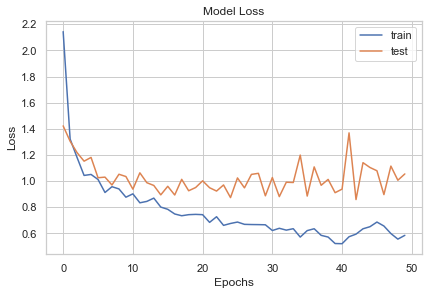

In [71]:
# mengvisualisasikan model loss pada setiap epoch dalam bentuk grafik
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

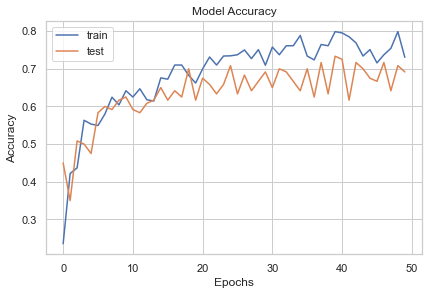

In [72]:
# mengvisualisasikan model akurasi pada setiap epoch dalam bentuk grafik
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [73]:
# mendapatkan prediksi
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

4/4 [==============================] - 2s 370ms/step


In [74]:
# menyimpan hasil beberapa data yang berhasil di prediksi
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

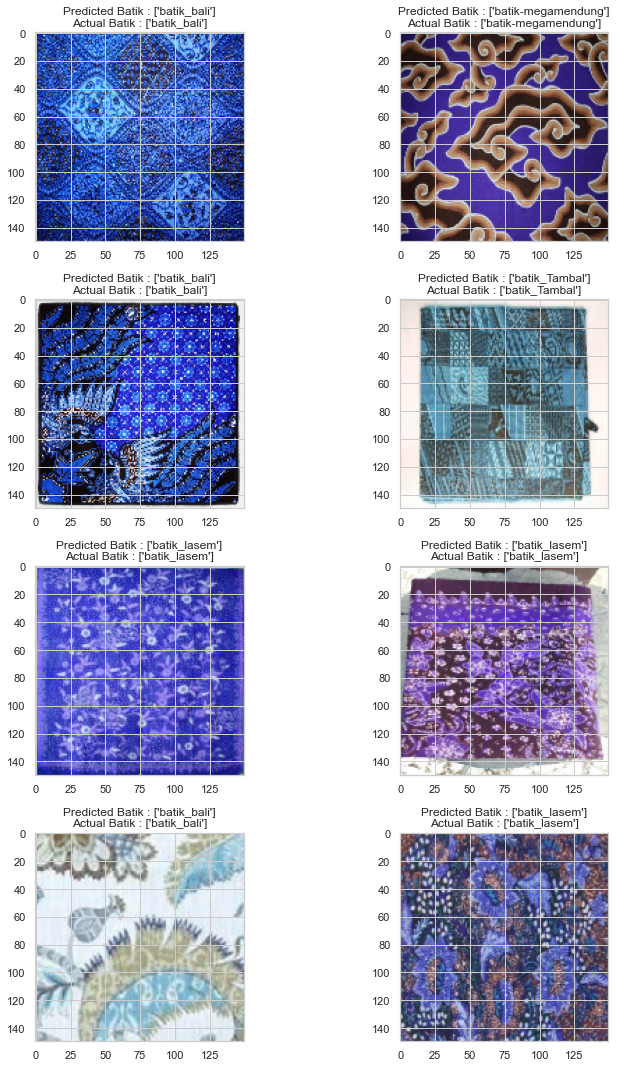

In [75]:
# memvisualisasikan hasil prediksi data dengan library matplotlib
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Batik : "
                          +str(le.inverse_transform([pred_digits[prop_class[count]]]))
                          +"\n"+"Actual Batik : "
                          +str(le.inverse_transform([np.argmax([y_test[prop_class[count]]])])))
        plt.tight_layout()
        count+=1

In [76]:
tf.saved_model.save(model, 'E:\\UPNVJ\\Semester 4\\PCD\\Fp')

INFO:tensorflow:Assets written to: E:\UPNVJ\Semester 4\PCD\Fp\assets


INFO:tensorflow:Assets written to: E:\UPNVJ\Semester 4\PCD\Fp\assets
